In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mglearn

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# 데이터 살펴보기

In [ ]:
hth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/health_data.csv", encoding = 'utf-8')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(hth.columns)
display(hth.info())
display(hth.head())

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
print(hth.isnull().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


In [ ]:
#결측치 있는 행 제거
hth = hth.dropna(axis=0)

In [ ]:
display(hth.head()) 
print(hth.info())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,1,2,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,1,1,138.0,88.0,94.0,223.0,328.0,46.0,111.0,16.6,1.0,1.0,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/2021
21,2020,22,41,F,11,155,50,65.9,0.7,1.0,1,1,114.0,73.0,94.0,254.0,85.0,55.0,182.0,11.8,1.0,0.8,24.0,14.0,12.0,No,No,1,0.0,0.0,12/29/2021
27,2020,28,11,M,17,155,60,82.0,0.5,0.7,1,1,139.0,85.0,104.0,195.0,75.0,57.0,112.0,14.3,1.0,1.4,33.0,22.0,29.0,No,Yes,1,0.0,0.0,12/29/2021
47,2020,48,26,M,16,165,65,94.0,1.5,0.6,2,2,110.0,72.0,114.0,199.0,106.0,53.0,125.0,16.3,1.0,1.0,28.0,20.0,43.0,No,Yes,1,0.0,0.0,12/29/2021


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         1249 non-null   int64  
 1   가입자일련번호      1249 non-null   int64  
 2   시도코드         1249 non-null   int64  
 3   성별코드         1249 non-null   object 
 4   연령대코드(5세단위)  1249 non-null   int64  
 5   신장(5Cm단위)    1249 non-null   int64  
 6   체중(5Kg 단위)   1249 non-null   int64  
 7   허리둘레         1249 non-null   float64
 8   시력(좌)        1249 non-null   float64
 9   시력(우)        1249 non-null   float64
 10  청력(좌)        1249 non-null   int64  
 11  청력(우)        1249 non-null   int64  
 12  수축기혈압        1249 non-null   float64
 13  이완기혈압        1249 non-null   float64
 14  식전혈당(공복혈당)   1249 non-null   float64
 15  총콜레스테롤       1249 non-null   float64
 16  트리글리세라이드     1249 non-null   float64
 17  HDL콜레스테롤     1249 non-null   float64
 18  LDL콜레스테롤     1249 non-null   float64
 19  혈색소   

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                                # 전체 폰트 개수

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔 폰트 개수 (설치된 것을 확인)

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share

In [ ]:
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
fm._rebuild()

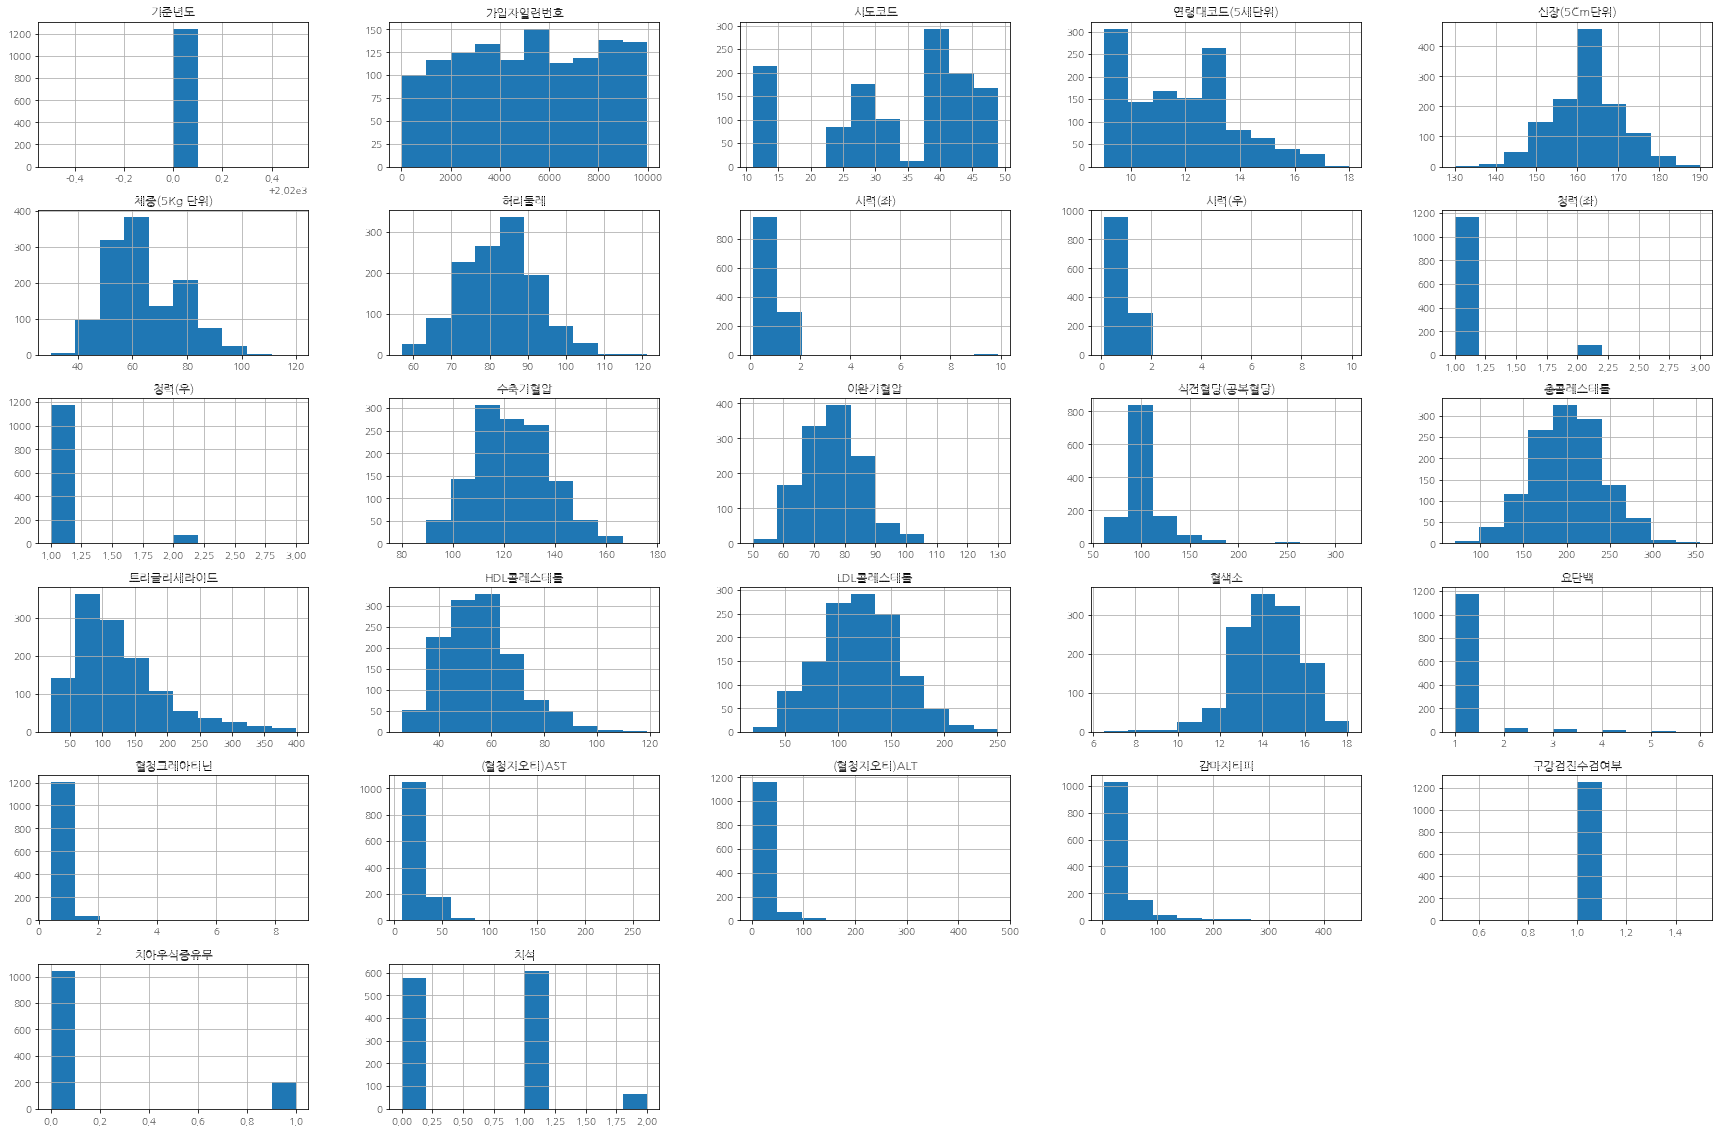

In [ ]:
h = hth.hist(figsize=(30,20))

# 문자형 변수 => 숫자형 변수로 변환

In [ ]:
# 문자형 변수: 성별코드, 흡연상태, 음주여부
# 성별코드 -- 남자:1, 여자:0
def male_or_female(x):
    if x == "M":
        return 1
    elif x == "F":
        return 0

In [ ]:
hth['성별코드'] = hth['성별코드'].apply(male_or_female)

In [ ]:
# 흡연상태 -- Yes:1, No:0
def smoke_non(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
  
hth['흡연상태'] = hth['흡연상태'].apply(smoke_non)

In [ ]:
# 음주여부 -- Yes:1, No:0
def drink_non(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0

hth['음주여부'] = hth['음주여부'].apply(drink_non)

In [ ]:
hth.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,1,2,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,1.0,1,1,0.0,1.0,12/29/2021
16,2020,17,30,1,11,160,65,90.0,0.6,0.6,1,1,138.0,88.0,94.0,223.0,328.0,46.0,111.0,16.6,1.0,1.0,29.0,54.0,24.0,0.0,1,1,0.0,1.0,12/29/2021
21,2020,22,41,0,11,155,50,65.9,0.7,1.0,1,1,114.0,73.0,94.0,254.0,85.0,55.0,182.0,11.8,1.0,0.8,24.0,14.0,12.0,0.0,0,1,0.0,0.0,12/29/2021
27,2020,28,11,1,17,155,60,82.0,0.5,0.7,1,1,139.0,85.0,104.0,195.0,75.0,57.0,112.0,14.3,1.0,1.4,33.0,22.0,29.0,0.0,1,1,0.0,0.0,12/29/2021
47,2020,48,26,1,16,165,65,94.0,1.5,0.6,2,2,110.0,72.0,114.0,199.0,106.0,53.0,125.0,16.3,1.0,1.0,28.0,20.0,43.0,0.0,1,1,0.0,0.0,12/29/2021


# 의사결정나무 -- 음주여부와 총콜레스테롤

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = hth[['총콜레스테롤']]
y = hth[['음주여부']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.654
시험용 데이터 정확도: 0.652


### 독립변수: 총콜레스테롤/ 종속변수: 음주여부로 놓고 의사결정나무를 시행했다. 알고리즘 학습을 위해 train_data의 크기는  0.75로, test_data의 크기는 0.25로 놓고 random_state는 42로 놓았다. 의사결정나무의 최대 깊이는 4로 random_state는 0으로 놓았다. 처음 생각했을 때는 음주여부는 총콜레스테롤과 상관관계가 높다고 생각하고 돌렸지만 학습용 데이터와 시험용 데이터 정확도 모두 0.65x로 높은 수치가 아니었다.

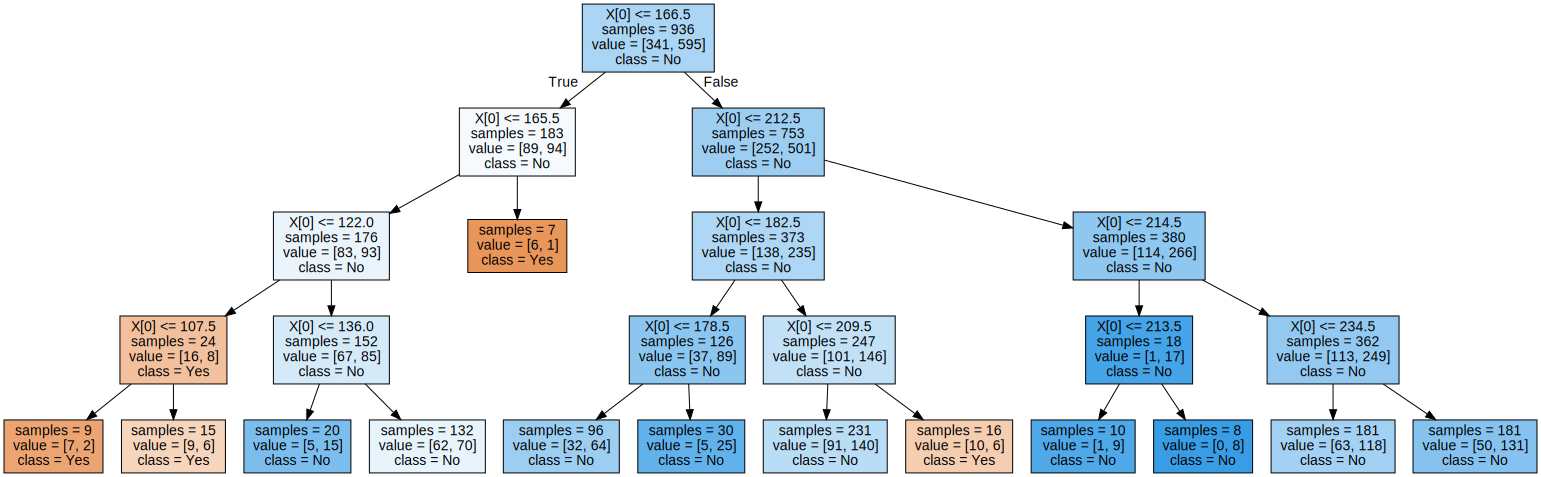

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "Yes", "No"], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### X는 촏콜레스테롤이고 class는 음주여부이다.

# 랜덤포레스트 -- 음주여부와 허리둘레, 식전혈당, 수축기혈압, 이완기혈압, 트리글리세라이드, LDL콜레스테롤, (혈청지오티)AST

In [ ]:
X = hth[['허리둘레','식전혈당(공복혈당)','수축기혈압','이완기혈압','트리글리세라이드','LDL콜레스테롤','(혈청지오티)AST']]
y = hth['음주여부']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### 독립변수로 허리둘레, 식전혈당, 수축기혈압, 이완기혈압, 트리글리세라이드, LDL콜레스테롤, (혈청지오티)AST / 종속변수로 음주여부를 놓았다. train_data: test_data의 비율을 0.75:0.25로, random_state를 42로 놓고 학습알고리즘을 만들었다.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


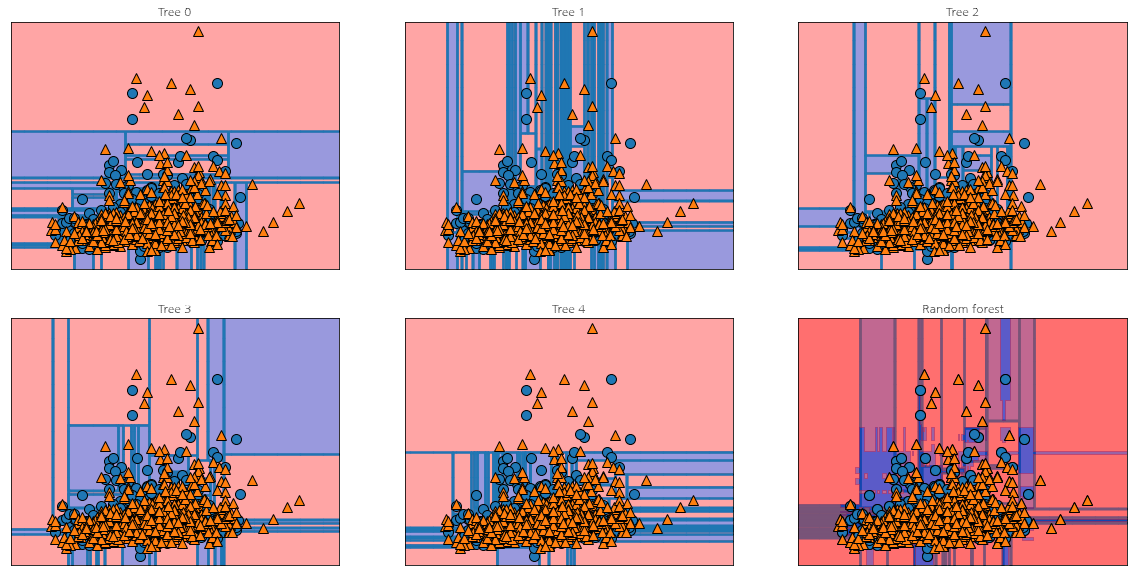

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=7, random_state=42)
forest.fit(X_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [ ]:
forest = RandomForestClassifier(n_estimators=15, random_state=42)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.995
시험용 데이터 세트 정확도: 0.613


### 랜덤포레스트를 시행한 결과 학습용 데이터 세트의 정확도는 0.995로 높았지만 시험용 데이터 세트의 정확도는 0.613으로 다소 떨어졌다. 이것으로 보아 알고리즘 학습이 너무 train_data에 맞춰진 과적합의 문제가 발생한 것으로 보인다.

# 그래디언트 부스팅 -- 흡연상태와 허리둘레, 수축기혈압, 이완기혈압, LDL콜레스테롤, 감마지티피

In [ ]:
X = hth[['허리둘레','수축기혈압','이완기혈압','LDL콜레스테롤','감마지티피']]
y = hth['흡연상태']

### 독립변수에 허리둘레, 수축기혈압, 이완기혈압, LDL콜레스테롤, 감마지티피 / 종속변수에 흡연상태를 놓았다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 나무 깊이 2로 제한, 학습률 조정
gbrt = GradientBoostingClassifier(random_state=32, max_depth=2, learning_rate=0.20)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.765
시험용 데이터 세트 정확도: 0.645


### 10번이 넘는 변수를 바꾸는 시행을 걸친 결과 시험용 데이터 세트의 정확도가 가장 높으면서 학습용 데이터 세트의 정확도와 많이 차이나지 않는 변수를 도출했다. 그 결과 나무의 최대 깊이를 2로, learning_rate를 0.2로 놓고, random_state를 32로 뒀다.

# 분류모델 평가

In [ ]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.54255319 0.54255319 0.62765957 0.57446809 0.5        0.56382979
 0.4516129  0.58064516 0.51612903 0.51612903]
Random forest:  [0.68085106 0.58510638 0.59574468 0.55319149 0.64893617 0.56382979
 0.51612903 0.64516129 0.62365591 0.56989247]
Gradient boosting:  [0.62765957 0.58510638 0.67021277 0.55319149 0.60638298 0.57446809
 0.6344086  0.61290323 0.62365591 0.56989247]
Accuracy mean
Decision tree :0.542
Random forest :0.598
Gradient boosting :0.606


### 의사결정나무의 정확도 평균은 0.542고, 랜덤포레스트의 정확도 평균은 0.598이고, 그레디언트 부스팅의 정확도 평균은 0.606으로 그레디언트 부스팅의 정확도가 세 모델중에 가장 높은 것을 확인할 수 있다.

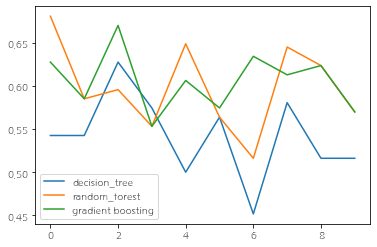

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient boosting',gbrt_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

### 그레디언트 부스팅과 의사결정나무의 최적의 cv값은 2고, 랜덤포레스트의 최적의 cv값은 4인 것을 확인할 수 있다.